## Homework1

In [2]:
import requests
res = requests.get('https://www.ptt.cc/bbs/creditcard/index.html')

In [3]:
res

<Response [200]>

In [5]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'lxml')

In [15]:
domain = 'https://www.ptt.cc'
articles = []

for rec in soup.select('.r-ent'):
  #print(rec)
  if rec.select_one('.title a'):
    title = rec.select_one('.title').text
    author = rec.select_one('.author').text
    date = rec.select_one('.date').text
    link = domain + rec.select_one('.title a').get('href')
    articles.append({'title':title, 'author':author, 'date':date, 'link':link})

In [16]:
articles[0]

{'author': 'usedata',
 'date': ' 7/15',
 'link': 'https://www.ptt.cc/bbs/creditcard/M.1594798800.A.812.html',
 'title': '\n[情報] 華南卡友你最行 2020食在精彩APP刮刮樂\n'}

In [17]:
import pandas
df = pandas.DataFrame(articles)

In [18]:
df.head()

,title,author,date,link
0,\n[情報] 華南卡友你最行 2020食在精彩APP刮刮樂\n,usedata,7/15,https://www.ptt.cc/bbs/creditcard/M.1594798800...
1,\n[問題] 國泰世華 7-11振興加碼活動\n,lianpig5566,7/15,https://www.ptt.cc/bbs/creditcard/M.1594800701...
2,\n富邦J卡綁振興券\n,vic5710789,7/15,https://www.ptt.cc/bbs/creditcard/M.1594800899...
3,\n[心得] 凱基現金回饋 新光寰宇現金回饋卡 核卡\n,stg20000,7/15,https://www.ptt.cc/bbs/creditcard/M.1594803198...
4,\nRe: [問題] 中國醫藥大學附設醫院(台中)_信用卡回饋?\n,a719417,7/15,https://www.ptt.cc/bbs/creditcard/M.1594810933...


In [23]:
df.to_csv('ptt_creditcard.csv', encoding = 'utf-8-sig')

## 英文斷詞

In [24]:
s = 'this is a book'
s.split()

['this', 'is', 'a', 'book']

## 中文斷詞

In [25]:
import jieba
s = '那酸民婉君也可以報名嗎?'
jieba.cut(s)

<generator object Tokenizer.cut at 0x7fe44b3cfeb8>

In [26]:
for w in jieba.cut(s):
  print(w)

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.979 seconds.
Prefix dict has been built successfully.


那酸民婉君
也
可以
報名
嗎
?


In [27]:
s = '''中央流行疫情指揮中心今天下午2時舉行例行記者會。指揮官陳時中宣布，7月16日起，兩歲以下持我國居留證的陸籍子女可以申請入境，也就是2018年7月7日(含)以後出生後的子女，父母可以陪同。符合該政策的人數約100多人，陪同者並未規定必須是孩童的父母。'''

In [28]:
import re
re.split('[，。]',s)

['中央流行疫情指揮中心今天下午2時舉行例行記者會',
 '指揮官陳時中宣布',
 '7月16日起',
 '兩歲以下持我國居留證的陸籍子女可以申請入境',
 '也就是2018年7月7日(含)以後出生後的子女',
 '父母可以陪同',
 '符合該政策的人數約100多人',
 '陪同者並未規定必須是孩童的父母',
 '']

In [29]:
jieba.get_dict_file()

<_io.BufferedReader name='/usr/local/lib/python3.6/dist-packages/jieba/dict.txt'>

In [30]:
! head /usr/local/lib/python3.6/dist-packages/jieba/dict.txt

AT&T 3 nz
B超 3 n
c# 3 nz
C# 3 nz
c++ 3 nz
C++ 3 nz
T恤 4 n
A座 3 n
A股 3 n
A型 3 n


## Jieba 斷詞實戰

In [31]:
import jieba
seg_list = jieba.cut("大巨蛋案對市府同仁下封口令？　柯P否認")
print("Default Mode:", "/ ".join(seg_list))

Default Mode: 大/ 巨蛋/ 案對/ 市府/ 同仁/ 下/ 封口令/ ？/ 　/ 柯/ P/ 否認


In [32]:
import jieba
seg_list = jieba.cut("大巨蛋案對市府同仁下封口令？　柯P否認", cut_all=True)
print("Full Mode:", "/ ".join(seg_list))

Full Mode: 大/ 巨蛋/ 案/ 對/ 市府/ 同仁/ 下/ 封口/ 封口令/ 口令/ ？/ 　/ / 柯/ P/ 否/ 認


In [33]:
! cat userdict.txt

大巨蛋
柯p

In [36]:
jieba.load_userdict('userdict.txt')

In [37]:
import jieba
seg_list = jieba.cut("大巨蛋案對市府同仁下封口令？　柯P否認")
print("/ ".join(seg_list))

大巨蛋/ 案對/ 市府/ 同仁/ 下/ 封口令/ ？/ 　/ 柯P/ 否認


In [38]:
jieba.get_dict_file().name

'/usr/local/lib/python3.6/dist-packages/jieba/dict.txt'

In [39]:
! git clone https://github.com/ldkrsi/jieba-zh_TW.git

Cloning into 'jieba-zh_TW'...
remote: Enumerating objects: 2320, done.
remote: Total 2320 (delta 0), reused 0 (delta 0), pack-reused 2320
Receiving objects: 100% (2320/2320), 44.97 MiB | 21.96 MiB/s, done.
Resolving deltas: 100% (1311/1311), done.


In [41]:
! ls jieba-zh_TW/

Changelog  jieba  LICENSE  MANIFEST.in	README.md


In [46]:
! mv jieba-zh_TW/jieba/* /usr/local/lib/python3.6/dist-packages/jieba/

mv: cannot stat 'jieba-zh_TW/jieba/*': No such file or directory


In [47]:
import jieba
seg_list = jieba.cut("大巨蛋案對市府同仁下封口令？　柯P否認")
print("/ ".join(seg_list))

大巨蛋/ 案對/ 市府/ 同仁/ 下/ 封口令/ ？/ 　/ 柯P/ 否認


In [49]:
import jieba.posseg as pseg
jieba.load_userdict('userdict.txt')
words = pseg.cut("大巨蛋案對市府同仁下封口令？　柯P否認")
for w in words:
    print(w.word, w.flag)


大巨蛋 n
案 ng
對 p
市府 n
同仁 nr
下 f
封口令 n
？ x
　 x
柯P n
否認 v


In [50]:
import requests
from bs4 import BeautifulSoup
res = requests.get('https://ec.ltn.com.tw/article/breakingnews/3229690')
soup = BeautifulSoup(res.text, 'lxml')

In [53]:
keywords = soup.select_one('meta[name="keywords"]').get('content')

In [55]:
with open('userdict.txt', 'a') as f:
  f.write('\n')
  for w in keywords.split(','):
    f.write(w + '\n')

In [56]:
! cat userdict.txt

大巨蛋 100 n
柯p 100 n
柯P 100 n
人口
全球人口
生育率
中國
美國


## Ckiptagger

In [57]:
! pip install -U ckiptagger

In [59]:
from ckiptagger import data_utils
data_utils.download_data_gdown("./")

Downloading...
From: https://drive.google.com/uc?id=1efHsY16pxK0lBD2gYCgCTnv1Swstq771
To: /content/data.zip
1.88GB [00:16, 115MB/s] 


In [1]:
% tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
from ckiptagger import data_utils, construct_dictionary, WS, POS, NER
ws = WS("./data")
pos = POS("./data")
ner = NER("./data")
sentence_list = [
"""已開發國家的生育率正明顯下降，而據國際醫學期刊「刺胳針」（The Lancet）報告，預計全球人口在2064年達到97億人的高峰後，將在2100年回落至88億人，刺胳針報告更估計，隨著高齡人口增加、工作年齡人口減少，經濟也將發生巨大變化，預計中國在2035年取代美國，成為全世界GDP最高的國家"""
]

word_sentence_list = ws(
 sentence_list,
)
pos_sentence_list = pos(word_sentence_list)
entity_sentence_list = ner(word_sentence_list, pos_sentence_list)



In [3]:
word_sentence_list

[['已',
  '開發',
  '國家',
  '的',
  '生育率',
  '正',
  '明顯',
  '下降',
  '，',
  '而',
  '據',
  '國際',
  '醫學',
  '期刊',
  '「',
  '刺胳針',
  '」',
  '（',
  'The Lancet',
  '）',
  '報告',
  '，',
  '預計',
  '全球',
  '人口',
  '在',
  '2064年',
  '達到',
  '97億',
  '人',
  '的',
  '高峰',
  '後',
  '，',
  '將',
  '在',
  '2100年',
  '回落',
  '至',
  '88億',
  '人',
  '，',
  '刺胳針',
  '報告',
  '更',
  '估計',
  '，',
  '隨著',
  '高齡',
  '人口',
  '增加',
  '、',
  '工作',
  '年齡',
  '人口',
  '減少',
  '，',
  '經濟',
  '也',
  '將',
  '發生',
  '巨大',
  '變化',
  '，',
  '預計',
  '中國',
  '在',
  '2035年',
  '取代',
  '美國',
  '，',
  '成為',
  '全',
  '世界',
  'GDP',
  '最',
  '高',
  '的',
  '國家']]

In [4]:
entity_sentence_list

[{(50, 55, 'DATE', '2064年'),
  (57, 60, 'CARDINAL', '97億'),
  (68, 73, 'DATE', '2100年'),
  (76, 79, 'CARDINAL', '88億'),
  (121, 123, 'GPE', '中國'),
  (124, 129, 'DATE', '2035年'),
  (131, 133, 'GPE', '美國')}]

## NLTK

In [5]:
import nltk
nltk.download('punkt')
text = """On the day when the government's top infectious disease specialist Anthony Fauci said he would not be surprised to see the US record 100,000 new coronavirus cases per day, Trump refused to break his deafening silence."""

sentences = nltk.sent_tokenize(text)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [6]:
sentences

["On the day when the government's top infectious disease specialist Anthony Fauci said he would not be surprised to see the US record 100,000 new coronavirus cases per day, Trump refused to break his deafening silence."]

In [7]:
from nltk.tokenize import word_tokenize
tokens = [word_tokenize(sent) for sent in sentences]



In [8]:
tokens

[['On',
  'the',
  'day',
  'when',
  'the',
  'government',
  "'s",
  'top',
  'infectious',
  'disease',
  'specialist',
  'Anthony',
  'Fauci',
  'said',
  'he',
  'would',
  'not',
  'be',
  'surprised',
  'to',
  'see',
  'the',
  'US',
  'record',
  '100,000',
  'new',
  'coronavirus',
  'cases',
  'per',
  'day',
  ',',
  'Trump',
  'refused',
  'to',
  'break',
  'his',
  'deafening',
  'silence',
  '.']]

In [9]:
import nltk.stem
s = nltk.stem.SnowballStemmer('english')
s.stem('graphics')

'graphic'

In [10]:
print(s.stem("imaging"))
print(s.stem("image"))
print(s.stem("imagination"))
print(s.stem("imagine"))

imag
imag
imagin
imagin


## 詞頻分析

In [14]:
from collections import Counter
li = ['a', 'b', 'c', 'a', 'b']
c = Counter(li)
c

Counter({'a': 2, 'b': 2, 'c': 1})

In [15]:
c.most_common(2)

[('a', 2), ('b', 2)]

In [11]:
s = '''
財經頻道／綜合報導〕已開發國家的生育率正明顯下降，而據國際醫學期刊「刺胳針」（The Lancet）報告，預計全球人口在2064年達到97億人的高峰後，將在2100年回落至88億人，刺胳針報告更估計，隨著高齡人口增加、工作年齡人口減少，經濟也將發生巨大變化，預計中國在2035年取代美國，成為全世界GDP最高的國家。

《CNBC》報導，權威醫學期刊「刺胳針」14日發布的新報告估計，現代避孕方法、改善女童與婦女的教育，可能導致全球生育率「普遍」和「持續」下降，其意味在缺乏自由移民政策的情況下，地球上195個國家中的183個，在本世紀將無法維持現有人口。

預計包括日本、泰國、義大利和西班牙等23個國家的人口，將減少超過一半，而包括中國的另外34個國家的人口，將減少超過25％；相對的，非洲撒哈拉沙漠以南地區的人口，預計將在本世紀內增長3倍，到2100年達到30.7億人，高於2017年估計的10.3億人。北非和中東地區，則是和2017年相比，另外兩個人口預計在2100年增加的地區。

研究更估計，隨著生育率下降，全世界超過80歲的人口數量，在2100年和低於5歲的人口比例將是2比1；到2100年，5歲以下兒童的數量將下降41％至4.01億人，同時年齡超過80歲的人口，將從1.41億增加6倍，至約8.66億人。

研究更顯示，工作年齡人口下降，可能大幅改變經濟規模，預計中國將在2035年取代美國，成為世界GDP最高國家，儘管若移民繼續維持美國的勞動力，且中國自2050年起人口迅速減少，則美國有望在2098年重登世界最大經濟體寶座。另外，印度預期將是在本世紀內，能維持其勞動人口數量的少數亞洲強國，其GDP將從當前的排名第7升至排名第3。

而撒哈拉以南的非洲地區，則在人口增長趨勢下，將於地緣政治舞台上成為日益強大的地區。

對於「刺胳針」的研究結果，倫敦大學學院教授Ibrahim Abubakar表示，如果其中有一半的內容正確，那麼移民將是所有國家的必需品，而非一種選擇，且眾所周知，移民對健康和經濟有積極影響，問題是國家要選擇藉有計畫的人口流動改善健康和財富，還是輸入底層勞工、導致社會失衡。
'''

In [16]:
import jieba
from collections import Counter
c = Counter(list(jieba.cut(s)))

In [19]:
## non-pythonic
ary = []
for w in jieba.cut(s):
  if len(w) >= 2:
    ary.append(w)

In [20]:
## Pythonic
[w for w in jieba.cut(s) if len(w) >= 2]

['財經',
 '頻道',
 '綜合',
 '報導',
 '已開',
 '發國家',
 '生育率',
 '正明顯',
 '下降',
 '而據',
 '國際',
 '醫學',
 '期刊',
 '胳針',
 'The',
 'Lancet',
 '報告',
 '預計',
 '全球',
 '人口',
 '2064',
 '97',
 '億人',
 '高峰',
 '將在',
 '2100',
 '回落',
 '88',
 '億人',
 '胳針',
 '報告',
 '估計',
 '隨著',
 '高齡',
 '人口',
 '增加',
 '工作',
 '年齡',
 '人口',
 '減少',
 '經濟',
 '將發生',
 '巨大',
 '變化',
 '預計',
 '中國',
 '2035',
 '取代',
 '美國',
 '成為',
 '全世界',
 'GDP',
 '最高',
 '國家',
 'CNBC',
 '報導',
 '權威',
 '醫學',
 '期刊',
 '胳針',
 '14',
 '發布',
 '報告',
 '估計',
 '現代',
 '避孕',
 '方法',
 '改善',
 '女童',
 '婦女',
 '教育',
 '可能',
 '導致',
 '全球',
 '生育率',
 '普遍',
 '持續',
 '下降',
 '意味',
 '缺乏',
 '自由',
 '移民',
 '政策',
 '情況',
 '地球',
 '195',
 '個國',
 '家中',
 '183',
 '本世紀',
 '將無法',
 '維持',
 '現有',
 '人口',
 '預計',
 '包括',
 '日本',
 '泰國',
 '大利',
 '西班牙',
 '23',
 '個國家',
 '人口',
 '將減',
 '超過',
 '一半',
 '包括',
 '中國',
 '另外',
 '34',
 '個國家',
 '人口',
 '將減',
 '超過',
 '25',
 '相對',
 '非洲',
 '撒哈拉沙漠',
 '以南',
 '地區',
 '人口',
 '預計將',
 '本世紀',
 '增長',
 '2100',
 '30.7',
 '億人',
 '2017',
 '估計',
 '10.3',
 '億人',
 '北非',
 '中東',
 '地區',
 '則是',
 '2017',
 '相比',

In [21]:
import jieba
from collections import Counter
c = Counter([w for w in jieba.cut(s) if len(w) >= 2])
c.most_common(10)

[('人口', 15),
 ('億人', 6),
 ('下降', 5),
 ('預計', 5),
 ('2100', 5),
 ('地區', 5),
 ('胳針', 4),
 ('估計', 4),
 ('移民', 4),
 ('超過', 4)]

In [24]:
#' '.join(jieba.cut(s))

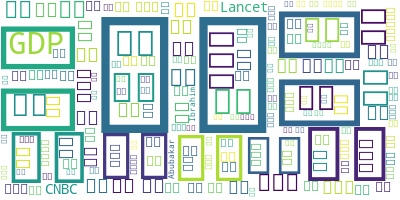

In [25]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(' '.join(jieba.cut(s)))
wordcloud.to_image()


In [26]:
! wget https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKtc-hinted.zip

--2020-07-15 13:38:03--  https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKtc-hinted.zip
Resolving noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)... 173.194.210.128, 2607:f8b0:400c:c0f::80
Connecting to noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)|173.194.210.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 121247366 (116M) [application/zip]
Saving to: ‘NotoSansCJKtc-hinted.zip’

NotoSansCJKtc-hinte 100%[===================>] 115.63M  64.8MB/s    in 1.8s    

2020-07-15 13:38:05 (64.8 MB/s) - ‘NotoSansCJKtc-hinted.zip’ saved [121247366/121247366]



In [27]:
! unzip NotoSansCJKtc-hinted.zip

Archive:  NotoSansCJKtc-hinted.zip
  inflating: LICENSE_OFL.txt         
  inflating: NotoSansCJKtc-Black.otf  
  inflating: NotoSansCJKtc-Bold.otf  
  inflating: NotoSansCJKtc-DemiLight.otf  
  inflating: NotoSansCJKtc-Light.otf  
  inflating: NotoSansCJKtc-Medium.otf  
  inflating: NotoSansCJKtc-Regular.otf  
  inflating: NotoSansCJKtc-Thin.otf  
  inflating: NotoSansMonoCJKtc-Bold.otf  
  inflating: NotoSansMonoCJKtc-Regular.otf  
  inflating: README                  


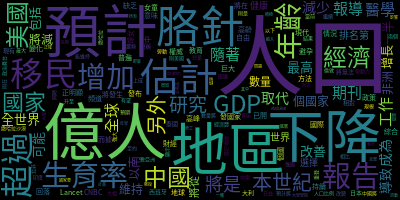

In [30]:
wc = WordCloud(background_color='black',font_path='/content/NotoSansCJKtc-Regular.otf')
wc.generate(' '.join(jieba.cut(s)))
wc.to_image()

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate('hello, this is david speaking')
wordcloud.to_image()
